### 온도 데이터 시각화

In [1]:
import warnings
warnings.filterwarnings(action='ignore') 

# Desktop Oracle에 온도를 기록

from time import sleep
import numpy as np
import random as rnd

import cx_Oracle  # Oracle
# import pymysql  # MariaDB, MySQL
import pandas as pd
# import mysql.connector
from sqlalchemy import create_engine  # Pandas -> Oracle

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc

plt.rcParams["font.size"] = 12         # 글자 크기
# plt.rcParams["figure.figsize"] = (10, 4) # 10:4의 그래프 비율
plt.rcParams['axes.unicode_minus'] = False  # minus 부호는 unicode 적용시 한글이 깨짐으로 설정
rc('font', family=font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name())

%matplotlib inline  

ModuleNotFoundError: No module named 'sqlalchemy'

In [2]:
# 등록, SQL 마지막 부분에 세미콜론이 있으면 에러가 발생함으로 삭제 할 것
# Oracle Connection 연결, user1234 계정으로 XE 사용.
conn = cx_Oracle.connect('user1234/1234@127.0.0.1:1521/XE')
cursor = conn.cursor()


# 목록
sql = '''
  SELECT ondono, kit, ondo, TO_CHAR(rdate, 'yyyy-mm-dd hh:mi:ss') as rdate 
  FROM ondo 
  ORDER BY ondono desc
'''
cursor.execute(sql)
 
rows = cursor.fetchall() # 모든 레코드의 산출
# print(type(rows))
# print(np.array(rows).shape)
# print(rows)
# print(type(rows[0]))  # <class 'tuple'>
for row in rows:
    fmt = "{0}, {1}, {2}, {3}"
    print (fmt.format(row[0], row[1], row[2], row[3]))
    


50, Raspberry 1, -22.0, 2021-10-21 02:53:50
51, Raspberry 1, -24.0, 2021-10-21 02:53:55
53, Raspberry 1, -25.0, 2021-10-21 02:54:00
54, Raspberry 1, -22.0, 2021-10-21 02:54:05
55, Raspberry 1, -24.0, 2021-10-21 02:54:10
56, Raspberry 1, -22.0, 2021-10-21 02:54:15
57, Raspberry 1, -21.0, 2021-10-21 02:54:20
58, Raspberry 1, -13.0, 2021-10-21 02:54:25
59, Raspberry 1, -14.0, 2021-10-21 02:54:30
60, Raspberry 1, -20.0, 2021-10-21 02:54:35
61, Raspberry 1, -17.0, 2021-10-21 02:54:40
62, Raspberry 1, -16.0, 2021-10-21 02:54:45
63, Raspberry 1, -11.0, 2021-10-21 02:54:50
64, Raspberry 1, -15.0, 2021-10-21 02:54:55
65, Raspberry 1, -8.0, 2021-10-21 02:55:00
66, Raspberry 1, -6.0, 2021-10-21 02:55:05
67, Raspberry 1, -8.0, 2021-10-21 02:55:10
68, Raspberry 1, -6.0, 2021-10-21 02:55:15
69, Raspberry 1, -29.0, 2021-10-21 02:59:44
70, Raspberry 1, -25.0, 2021-10-21 02:59:48
71, Raspberry 1, -33.0, 2021-10-21 02:59:53
72, Raspberry 1, -31.0, 2021-10-21 02:59:58
73, Raspberry 1, -29.0, 2021-10-21 0

In [3]:
# 30개만 출력
sql = '''
SELECT ondono, kit, ondo, rdate, r
FROM (
      SELECT ondono, kit, ondo, rdate, rownum as r
      FROM (
            SELECT ondono, kit, ondo, TO_CHAR(rdate, 'yyyy-mm-dd hh:mi:ss') as rdate 
            FROM ondo 
            ORDER BY ondono desc
      )       
)
WHERE r >= 1 AND r <= 30
'''
cursor.execute(sql)
 
# rows = cursor.fetchall() # 모든 레코드의 산출
df = pd.read_sql(sql, conn)


df

,ONDONO,KIT,ONDO,RDATE,R
0,50,Raspberry 1,-22.0,2021-10-21 02:53:50,1
1,51,Raspberry 1,-24.0,2021-10-21 02:53:55,2
2,53,Raspberry 1,-25.0,2021-10-21 02:54:00,3
3,54,Raspberry 1,-22.0,2021-10-21 02:54:05,4
4,55,Raspberry 1,-24.0,2021-10-21 02:54:10,5
5,56,Raspberry 1,-22.0,2021-10-21 02:54:15,6
6,57,Raspberry 1,-21.0,2021-10-21 02:54:20,7
7,58,Raspberry 1,-13.0,2021-10-21 02:54:25,8
8,59,Raspberry 1,-14.0,2021-10-21 02:54:30,9
9,60,Raspberry 1,-20.0,2021-10-21 02:54:35,10


In [4]:
df.set_index('RDATE',inplace=True)
df


,ONDONO,KIT,ONDO,R
RDATE,,,,
2021-10-21 02:53:50,50,Raspberry 1,-22.0,1
2021-10-21 02:53:55,51,Raspberry 1,-24.0,2
2021-10-21 02:54:00,53,Raspberry 1,-25.0,3
2021-10-21 02:54:05,54,Raspberry 1,-22.0,4
2021-10-21 02:54:10,55,Raspberry 1,-24.0,5
2021-10-21 02:54:15,56,Raspberry 1,-22.0,6
2021-10-21 02:54:20,57,Raspberry 1,-21.0,7
2021-10-21 02:54:25,58,Raspberry 1,-13.0,8
2021-10-21 02:54:30,59,Raspberry 1,-14.0,9


In [5]:
df['ONDO']

RDATE
2021-10-21 02:53:50   -22.0
2021-10-21 02:53:55   -24.0
2021-10-21 02:54:00   -25.0
2021-10-21 02:54:05   -22.0
2021-10-21 02:54:10   -24.0
2021-10-21 02:54:15   -22.0
2021-10-21 02:54:20   -21.0
2021-10-21 02:54:25   -13.0
2021-10-21 02:54:30   -14.0
2021-10-21 02:54:35   -20.0
2021-10-21 02:54:40   -17.0
2021-10-21 02:54:45   -16.0
2021-10-21 02:54:50   -11.0
2021-10-21 02:54:55   -15.0
2021-10-21 02:55:00    -8.0
2021-10-21 02:55:05    -6.0
2021-10-21 02:55:10    -8.0
2021-10-21 02:55:15    -6.0
2021-10-21 02:59:44   -29.0
2021-10-21 02:59:48   -25.0
2021-10-21 02:59:53   -33.0
2021-10-21 02:59:58   -31.0
2021-10-21 03:00:03   -29.0
2021-10-21 03:00:08   -25.0
2021-10-21 03:00:13   -22.0
2021-10-21 03:00:18   -26.0
2021-10-21 03:00:23   -24.0
2021-10-21 03:00:28   -22.0
2021-10-21 03:00:34   -25.0
2021-10-21 03:00:39   -24.0
Name: ONDO, dtype: float64

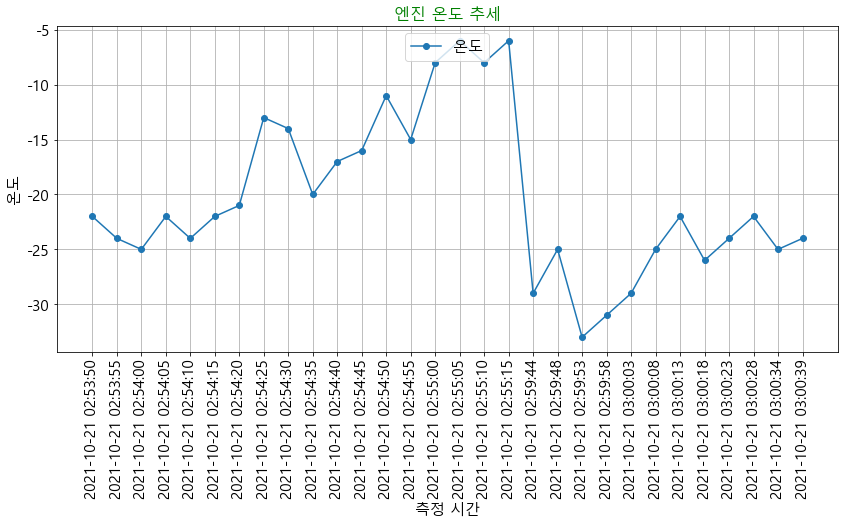

In [6]:
plt.rcParams["figure.figsize"] = (14,6) # 그래프 크기 
plt.rc('font',size=15)   # 글씨 크기 
plt.xticks(rotation=90)  # x축 글씨 회전 
plt.plot(df.index,df['ONDO'], label='온도', marker='o')
plt.title('엔진 온도 추세', fontdict={'size': 16, 'color': 'green'})
plt.xlabel('측정 시간')
plt.ylabel('온도')
plt.legend(loc='upper center')  # 범례, 상단중앙
plt.grid(True)
plt.show()

In [ ]:
conn.close()    